# Sales Prediction for Big Mart Outlets

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. ***The aim is to build a predictive model and predict the sales of each product at a particular outlet.**

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

Business Goal : Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

Analysis:

Type of problem: Supervised Learning problem
Target feature : Item_Outlet_Sales
We will handle this problem in a structured way following the table of content given below: 
 1) Problem Statement

2) Hypothesis Generation

3) Loading Packages and Data

4) Data Structure and Content

5) Exploratory Data Analysis

6) Univariate Analysis

7) Bivariate Analysis
8) Missing Value Treatment
9) Feature Engineering
10) Encoding Categorical Variables
11) Label Encoding
12) One Hot Encoding
13) PreProcessing Data
14) Modeling
15) Linear Regression
16) Regularized Linear Regression
17) RandomForest
18) XGBoost
19) Predictions & Summary
20) Saving The Final Model

## 2) Hypothesis Generation

There are four (04) hypothesis that we would want to test after the EDA:

On basis of item:
* Item visibility in store: The location of product in a store will impact sales. Ones which are right at entrance will catch the eye of customer first rather than the ones in back.

* Product Frequency: More frequent products will have high Sales.

On basis of store:

* City type: Stores located in urban cities should have higher sales because of the higher income levels of people there.

* Store capacity: Stores which are very big in size should have higher sales as they act like one-stop-shops and people would prefer getting everything from one place.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder,PolynomialFeatures,StandardScaler 
from sklearn.linear_model import LinearRegression,ElasticNet,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor 

import warnings
warnings.filterwarnings('ignore')

import pickle 

np.random.seed(0)

In [2]:
train=pd.read_csv("~/Downloads/train_v9rqX0R.csv")
test=pd.read_csv("~/Downloads/test_AbJTz2l.csv")

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
train.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

### Inference 
* We can see that maximum products present in the store are Fruits and Vegetables,Snack foods,Household...
* We can see that min product type is seafood.

In [6]:
row_count,column_count=train.shape
print('Rows',row_count)
print('Columns',column_count)

Rows 8523
Columns 12


In [7]:
row_count,column_count=test.shape
print('Rows',row_count)
print('Columns',column_count)

Rows 5681
Columns 11


In [8]:
train.info()

#  We can see there are some missing values in the columns like :- Item_Weight, Outlet_Size

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### Features Description:

**Numerical features:**

* **Item_Weight** : Weight of the product or item.
* **Item_Visibility** The % of the total display area of all products in a store allocated to the particular product.
* **Item_MRP** : Maximum Retail Price (list price) of the product
* **Outlet_Establishment_Year** : The year in which the store was established.
* **Item_Outlet_Sales** : sales of the product in a particular store. This is the target variable to be predicted.

**Categorical features:**

* **Item_Identifier** Unique product ID (we would want to drop this column later)
* **Item_Fat_Content** : Whether the product is low, fat or not
* **Item_Type** : The category to which the product belongs.
* **Outlet_Identifier** : Unique store ID
* **Outlet_Size** : The size of the store in terms of ground area covered.
* **Outlet_Location_Type** : The type of city in which the store is located.
* **Outlet_Type** : Whether the outlet is just a grocery store or some sort of supermarket.

In [9]:
train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Item_Identifier,8523,1559,FDW13,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Weight,7060.0,NaN,NaN,NaN,12.857645,4.643456,4.555,8.77375,12.6,16.85,21.35
Item_Fat_Content,8523,5,Low Fat,5089,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Visibility,8523.0,NaN,NaN,NaN,0.066132,0.051598,0.0,0.026989,0.053931,0.094585,0.328391
Item_Type,8523,16,Fruits and Vegetables,1232,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_MRP,8523.0,NaN,NaN,NaN,140.992782,62.275067,31.29,93.8265,143.0128,185.6437,266.8884
Outlet_Identifier,8523,10,OUT027,935,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Establishment_Year,8523.0,NaN,NaN,NaN,1997.831867,8.37176,1985.0,1987.0,1999.0,2004.0,2009.0
Outlet_Size,6113,3,Medium,2793,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Location_Type,8523,3,Tier 3,3350,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
(train.isnull().sum()/train.shape[0])*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [11]:
train.isnull().sum().sort_values(ascending=False)

Outlet_Size                  2410
Item_Weight                  1463
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

We can observe that we are having:

**2410 missing values in the Outlet_Size** feature which is a categorical feature.

**1463 missing values in the Item_Weight feature**

For dealing with missing values, you'll need to use our intuition. Generally to figure out why the values are missing, we can ask ourself:

Are these values missing because they weren't recorded or because they does't exist?

**Doesn't exist** : then we can keep them as NaN or simply drop them.

**Weren't recorded**: then we can do imputation using different techniques. I'll choose between mean and mode imputation

In [12]:
train['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [13]:
train['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

**This "Outlet_Identifier" feature can be extremely important for the modelling** part since there are only ten(10) values corresponding exactly to the ten(10) stores in which the data have been collected

In [14]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


 We can see there are some missing values in the column - Item_Weight,Outlet_Size

## Exploratory Data Analysis

In [16]:
# Univariate Analysis

num_cols=train.select_dtypes(include=np.number).columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [17]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


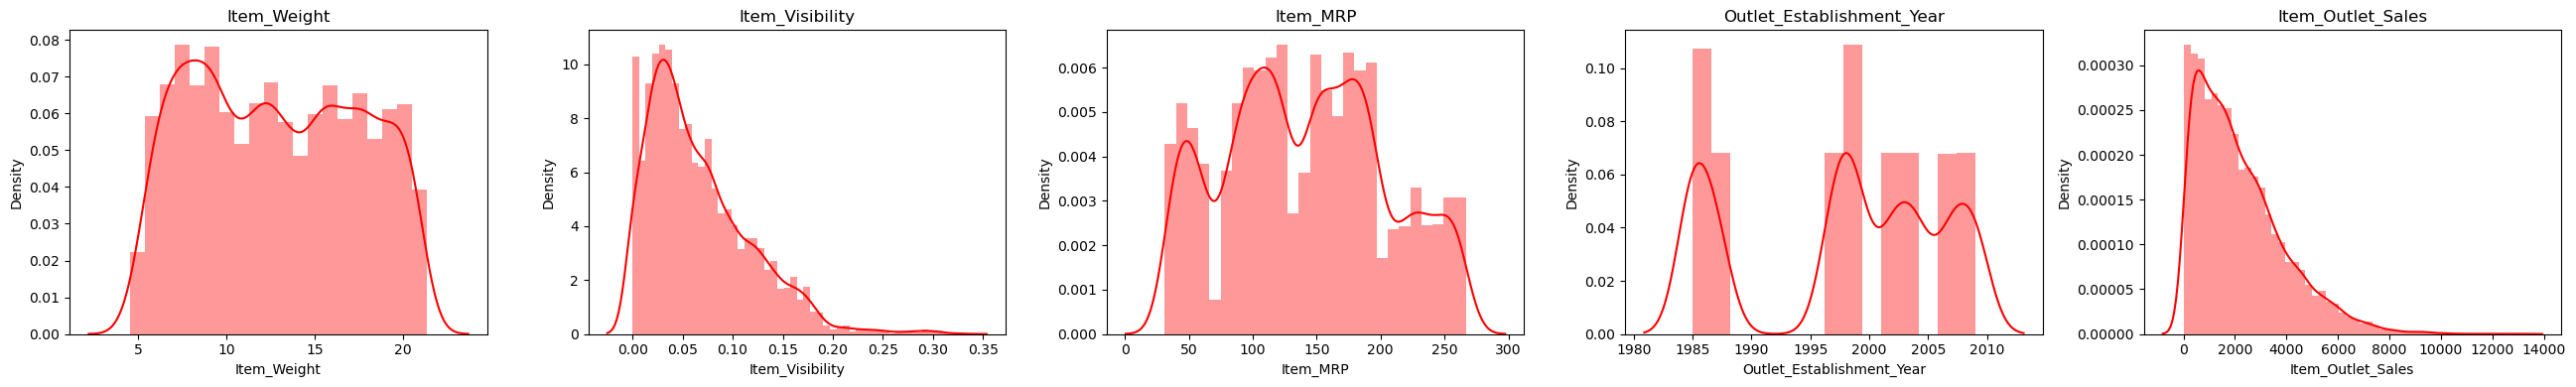

In [18]:
plt.figure(figsize=(26,4))
t=1
for i in num_cols:
    plt.subplot(1,5,t)
    sns.distplot(train[i],color='red')
    t=t+1
    plt.title(i)
plt.tight_layout()
plt.show()

## Observations:

* We observe that the item weight range from 5 Kg to 20 Kg.

* Item Visibility Feature is Right Skewed. 

* There are more products in the range of 100 MRP-180 MRP in Item_MRP.

* We can observe There are lot of store that are established in the year 1985,1998 etc, and no store establishment between 1990 and 1995.

* Item_outlet_Sales feature is right skewed. We can may try to do a transformation in order to obtain a normal or Gaussian distribution.

In [19]:
nums_cols=test.select_dtypes(include=np.number).columns
nums_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')

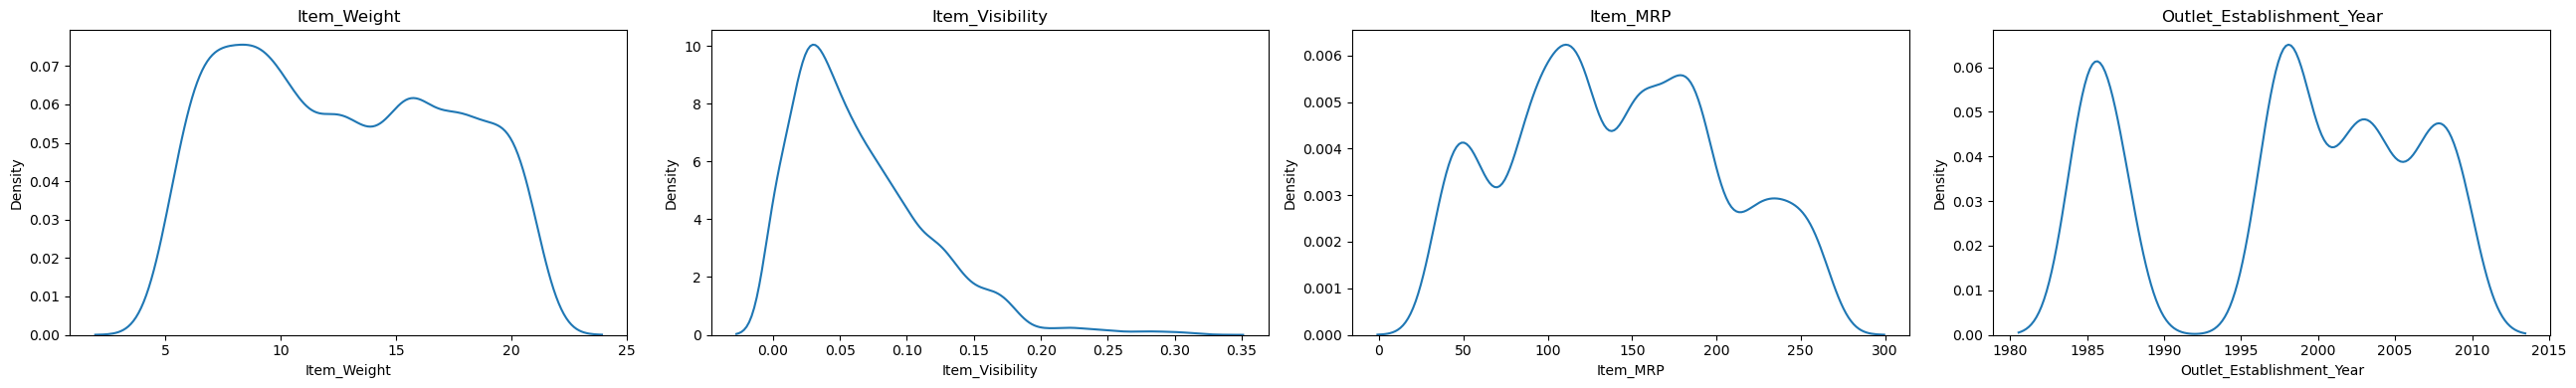

In [20]:
plt.figure(figsize=(26,4))
t=1
for i in nums_cols:
    plt.subplot(1,4,t)
    sns.kdeplot(test[i])
    t=t+1
    plt.title(i)
plt.tight_layout()
plt.show()

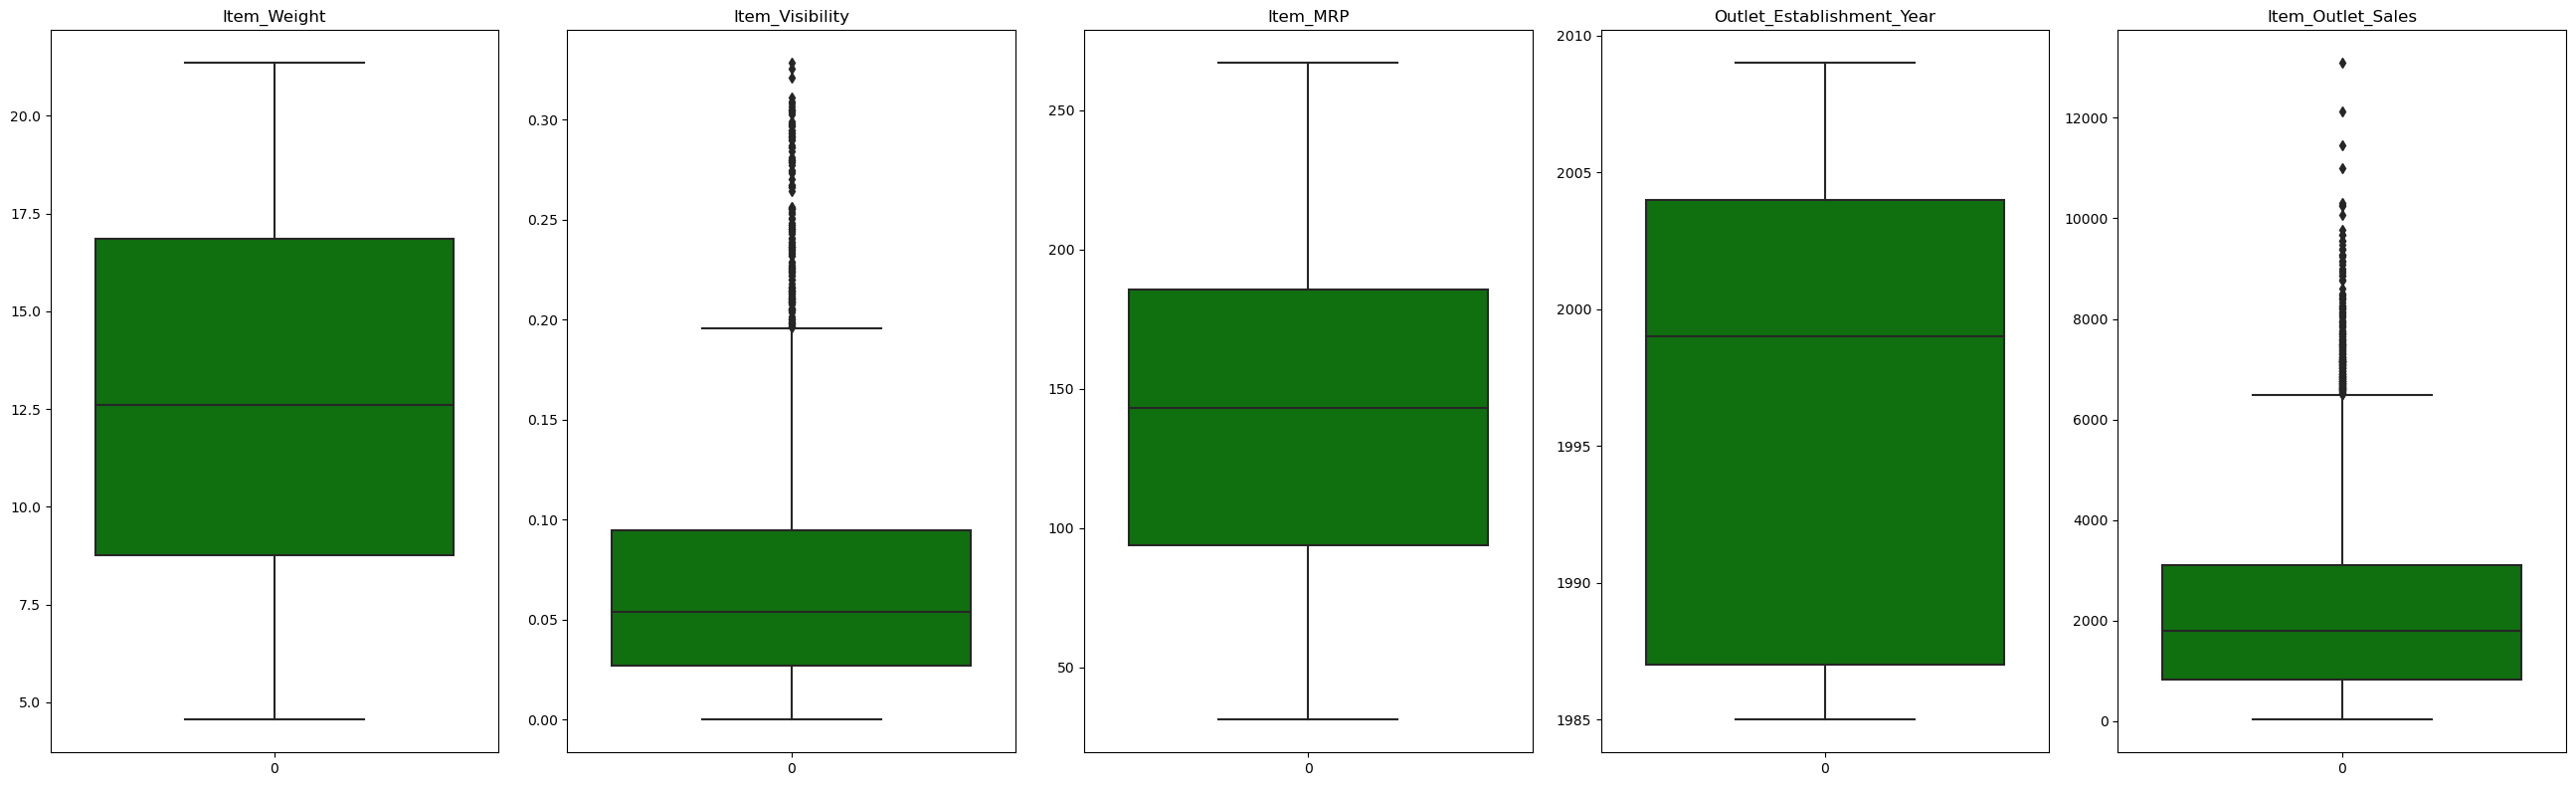

In [21]:
plt.figure(figsize=(26,8))
t=1
for i in num_cols:
    plt.subplot(1,5,t)
    sns.boxplot(train[i],color='green')
    t=t+1
    plt.title(i)
plt.tight_layout()
plt.show()

## Observations:

* There are almost no outliers in the Item_Weight, Item_MRP and Outlet_Establishment_Year features.

* Conversely there are some **outliers to be removed in the Item_Visibility and Item_Outlet_Sales features**.

* The train and the test data have almost the same distributions

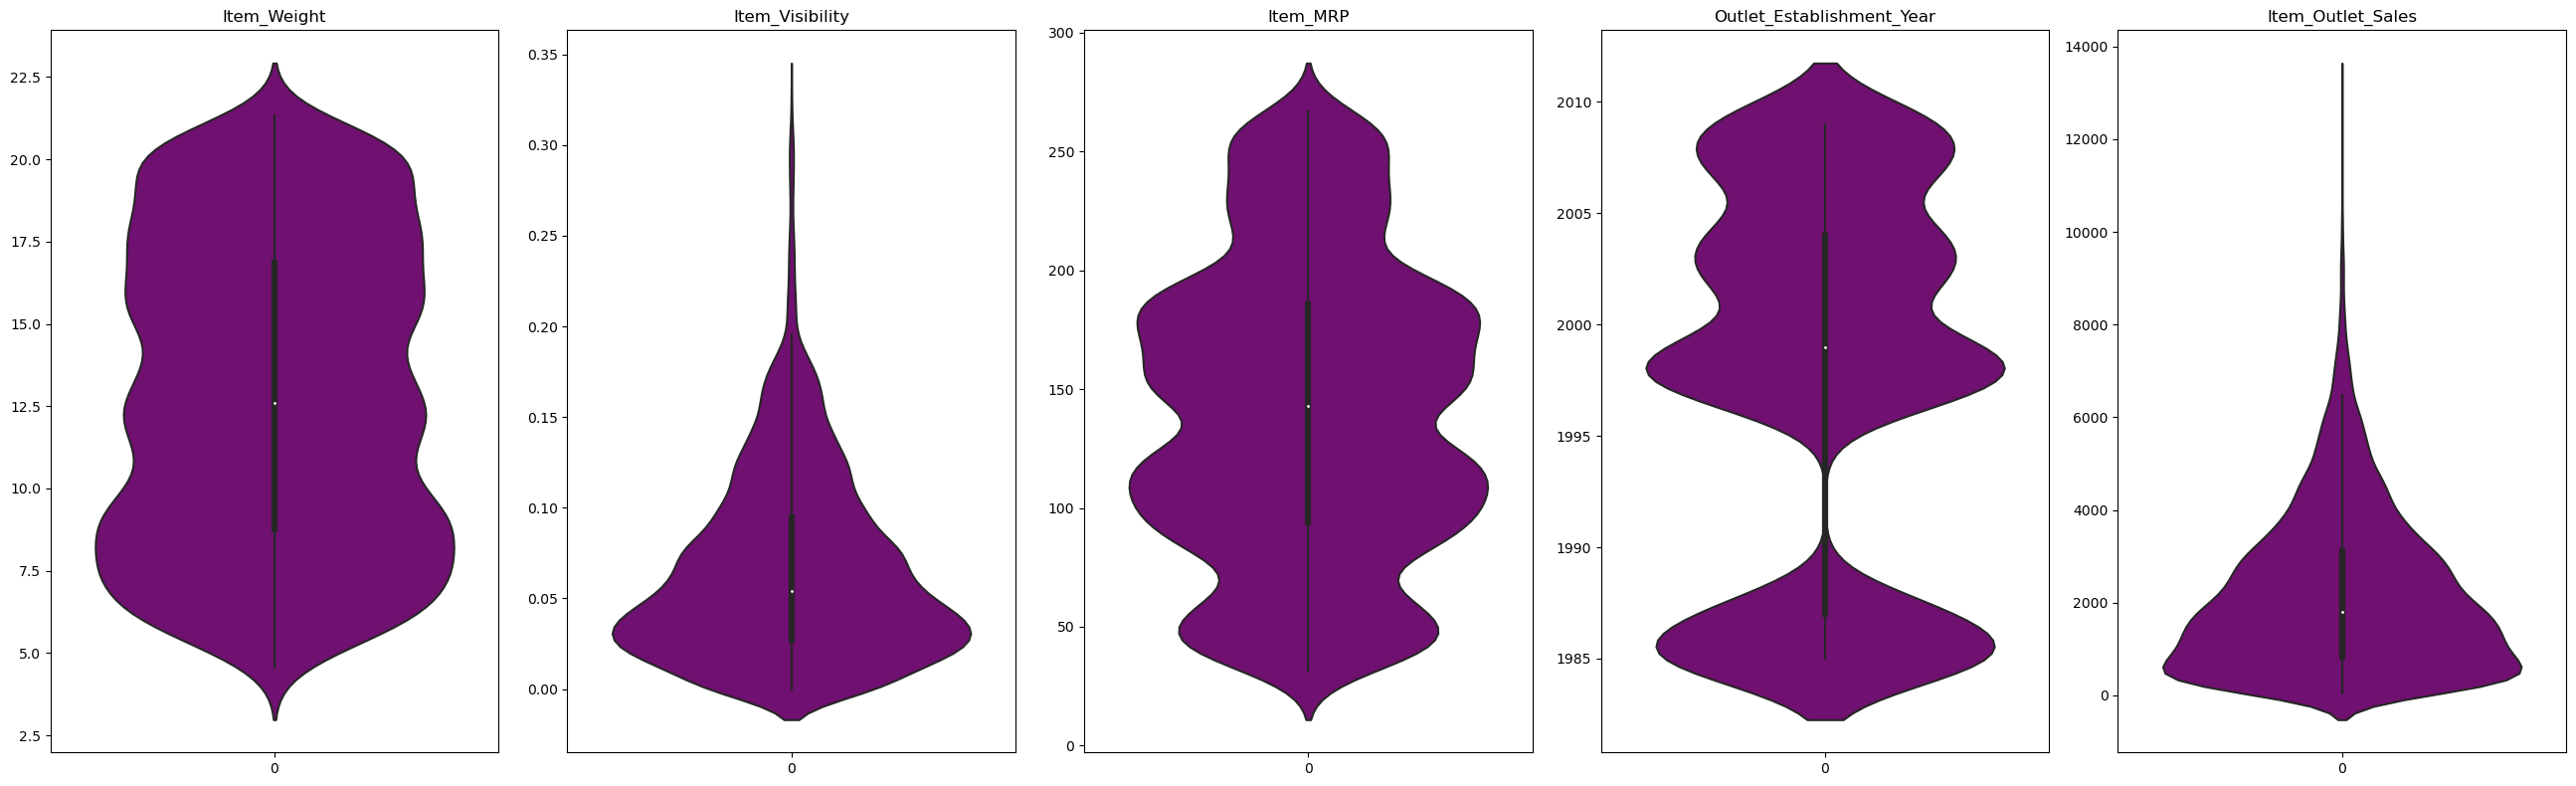

In [22]:
plt.figure(figsize=(26,8))
t=1
for i in num_cols:
    plt.subplot(1,5,t)
    sns.violinplot(data=train[i],color='purple')
    t=t+1
    plt.title(i)
plt.tight_layout()
plt.show()

These graphs confirm the above observations about outliers in Item_Visibility and Item_Outlet_Sales features.

In [23]:
cat_cols=train.select_dtypes(include='object').columns
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [24]:
for i in cat_cols:
    
    print(f"Number of values in the {i} column is:\n{train[i].value_counts() }")
print( )
print('--' * 30)

Number of values in the Item_Identifier column is:
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64
Number of values in the Item_Fat_Content column is:
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
Number of values in the Item_Type column is:
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
Number of values in the Outlet_Identifier c

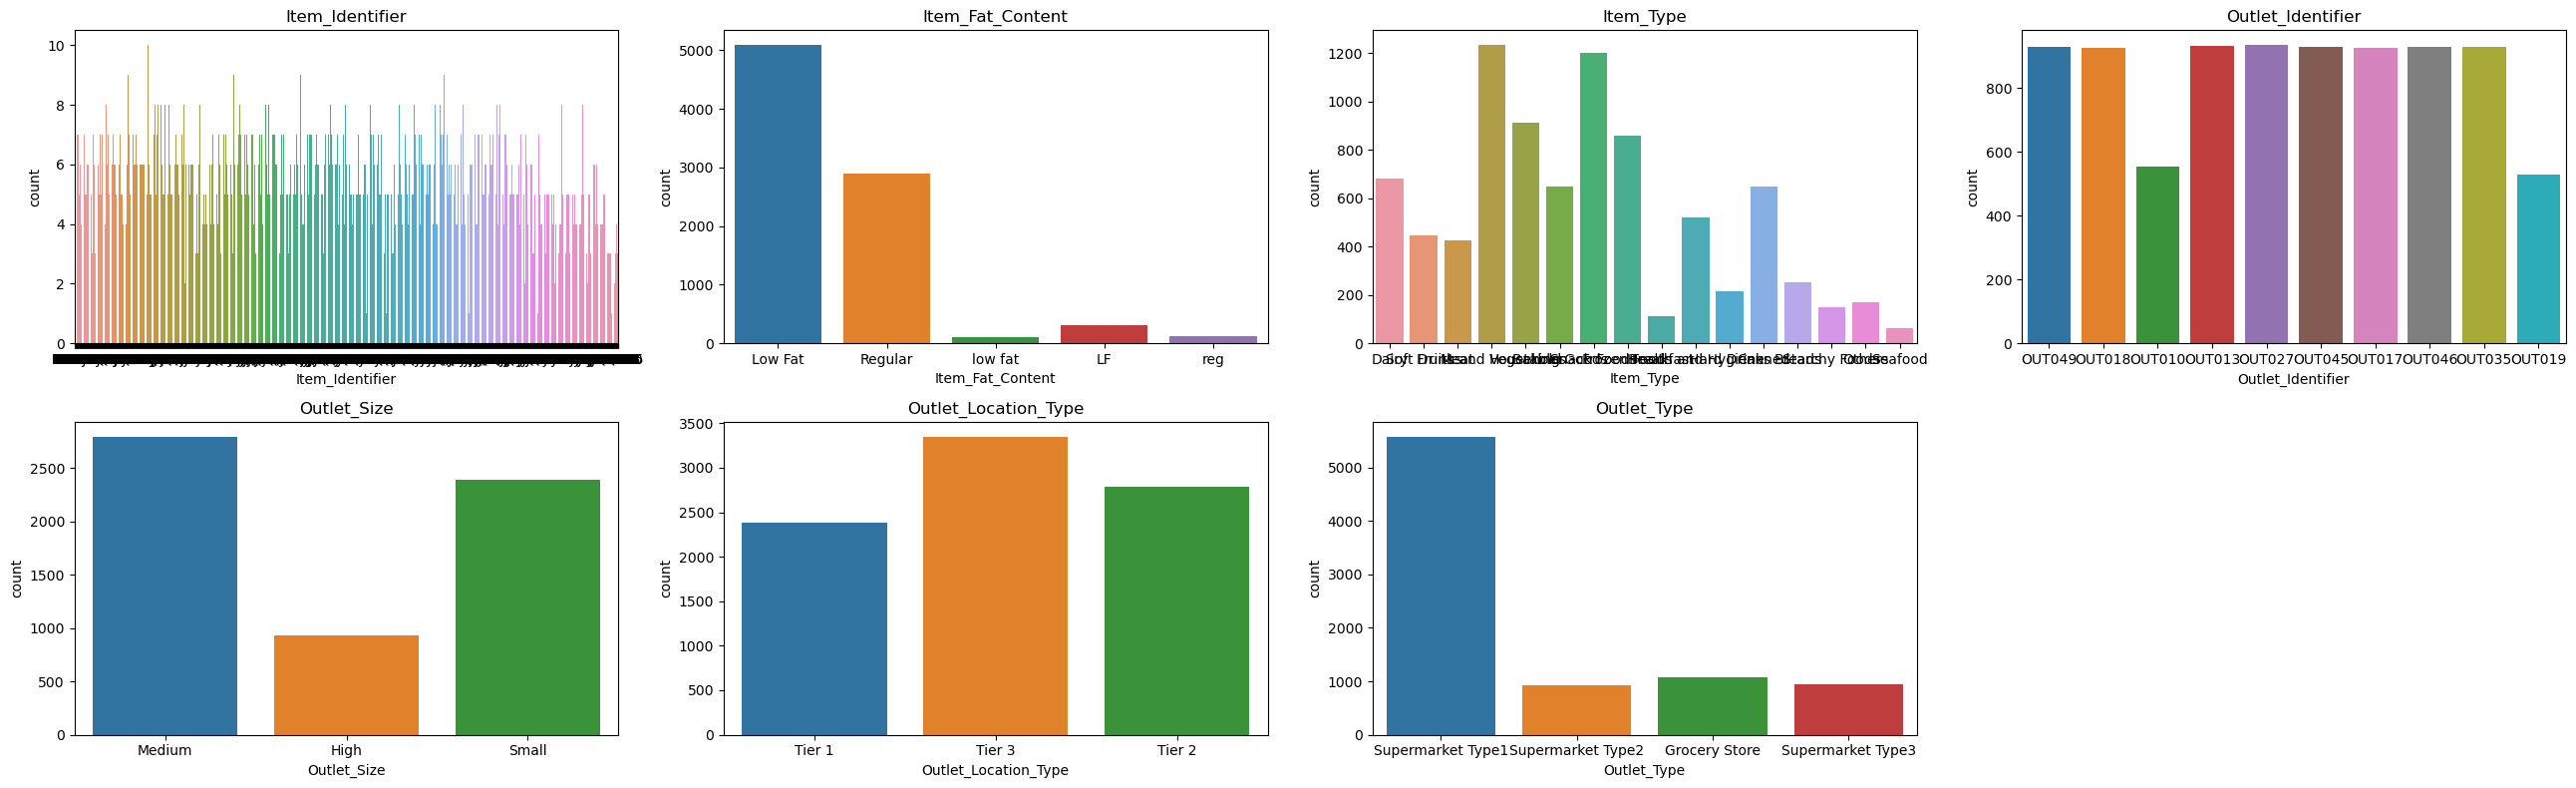

In [25]:
plt.figure(figsize=(26,8))
t=1
for i in cat_cols:
    plt.subplot(2,4,t)
    sns.countplot(data=train, x=i)
    t=t+1
    plt.title(i)
plt.tight_layout()
plt.show()

In [26]:
categorical_cols_to_display = [ 
                                 'Item_Fat_Content',
                                 'Item_Type',
                                 'Outlet_Size',
                                 'Outlet_Location_Type',
                                 'Outlet_Type'
                                ]

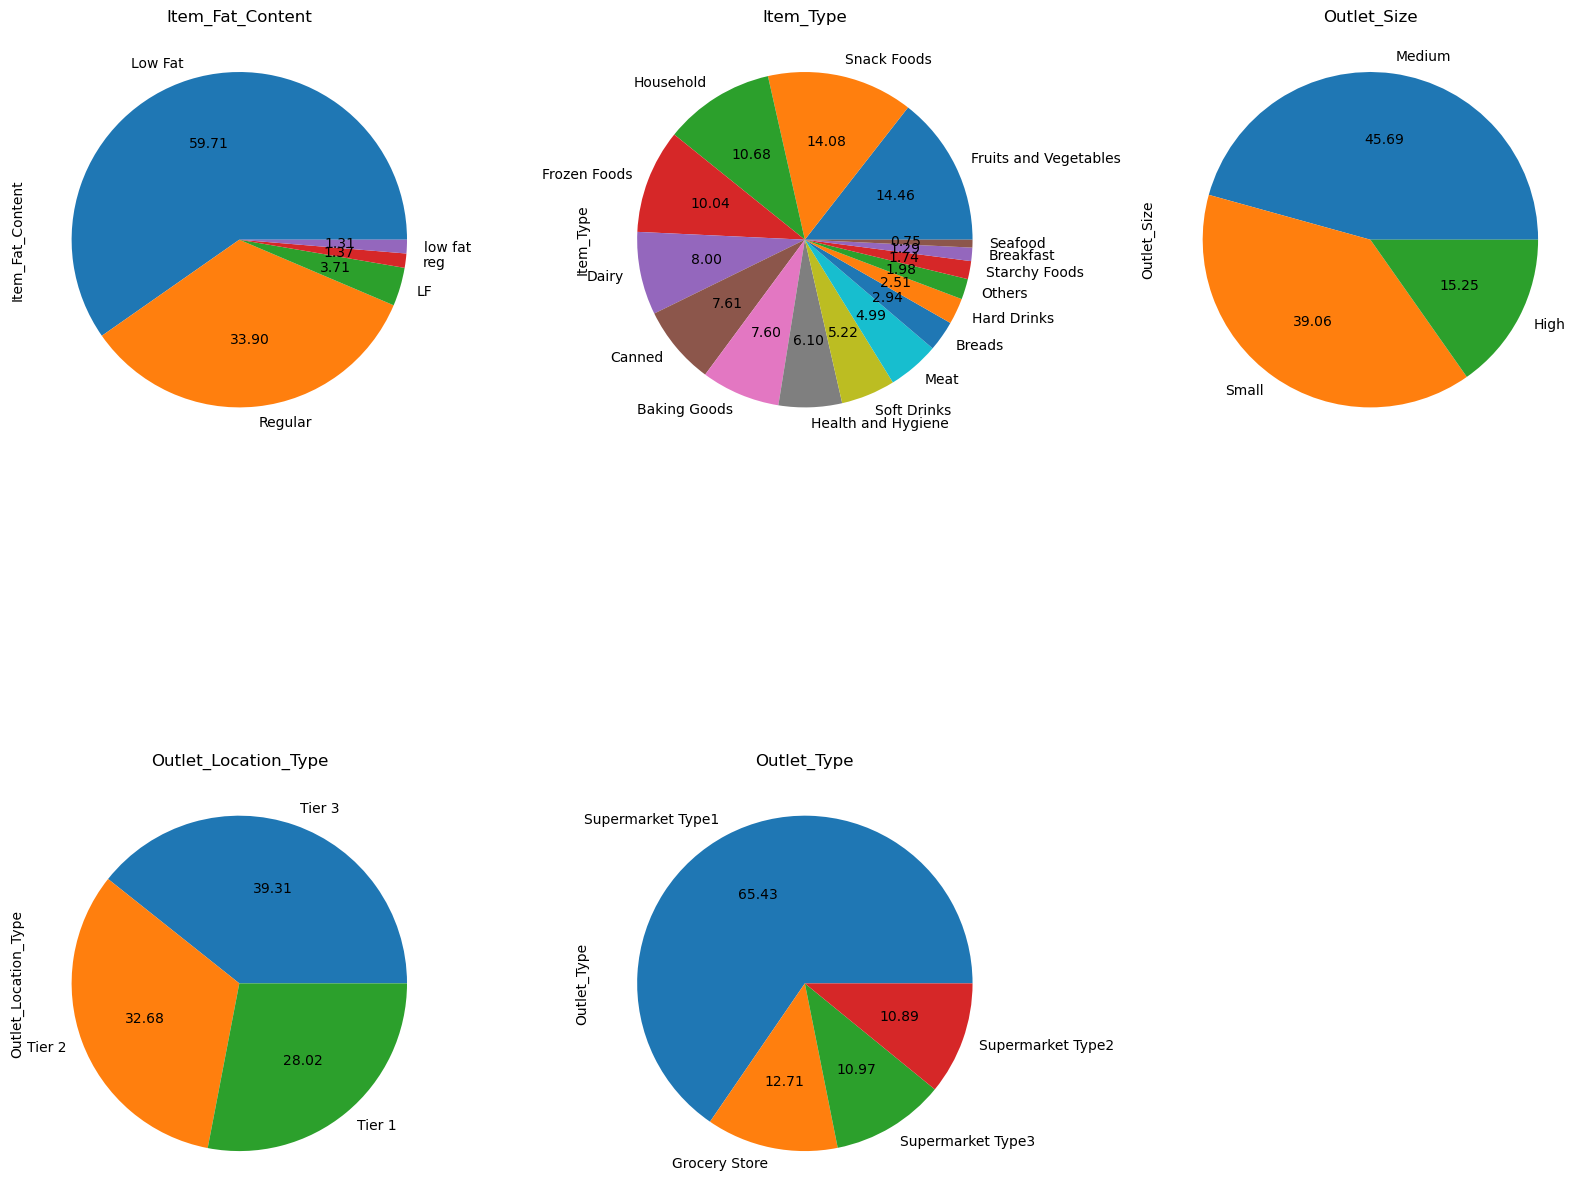

In [27]:
plt.figure(figsize=(16,16))
t=1
for i in categorical_cols_to_display:
    plt.subplot(2,3,t)
    train[i].value_counts().plot(kind='pie',autopct='%.2f')
    t=t+1
    plt.title(i)
plt.tight_layout()
plt.show()

## Observations:

* The Item_Fat_Content column must be cleaned because there are some entry errors:

    * 'Low Fat', 'low fat' and 'LF' should be the same category

    * Similarly 'Regular' and 'reg' should the same Another remarq in this column is that 'Low Fat' item category is greater than 'Regular' one.

* There are 16 different categories in the the Item_type feature. I think it's a lot. May be in the feature engineering section we can try to group them into categories. For example grouping:

    * 'Soft Drinks' and 'Hard Drinks' into a 'Drinks' category or
    * 'Snack Foods', 'Frozen Foods', 'Snarchy Foods' and 'Seafood' into a     'Foods' category.
* To encode the Outlet_Location_Type feature, we just have to extract the last character i.e:

    * 'Tier 1' ---> 1
    * 'Tier 2' ---> 2
    * 'Tier 3' ---> 3

#### Bivariate Analysis

In [28]:
nums=['Item_Weight', 'Item_Visibility', 'Item_MRP']

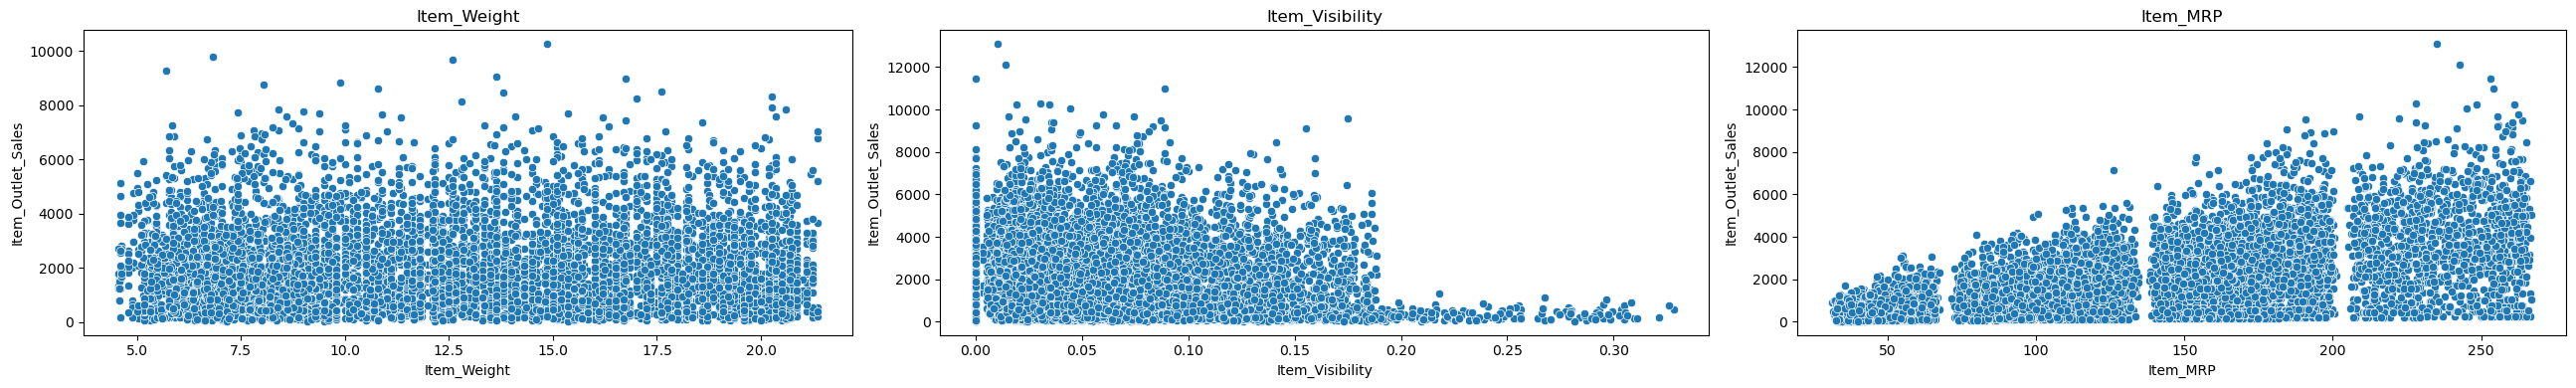

In [29]:
plt.figure(figsize=(26,4))
t=1
for i in nums:
    plt.subplot(1,3,t)
    sns.scatterplot(data=train,x=i,y='Item_Outlet_Sales')
    t=t+1
    plt.title(i)
plt.tight_layout()
plt.show()

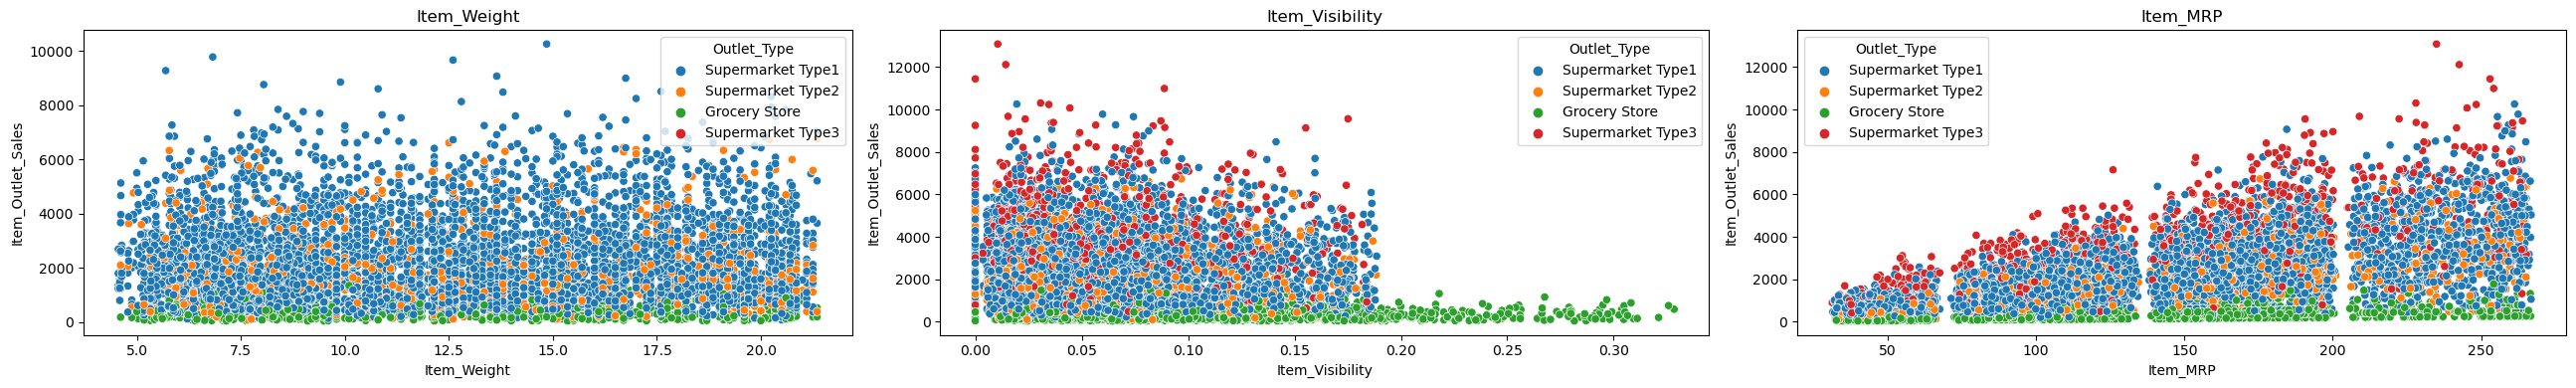

In [30]:
plt.figure(figsize=(26,4))
t=1
for i in nums:
    plt.subplot(1,3,t)
    sns.scatterplot(data=train,x=i,y='Item_Outlet_Sales',hue='Outlet_Type')
    t=t+1
    plt.title(i)
plt.tight_layout()
plt.show()

<Axes: >

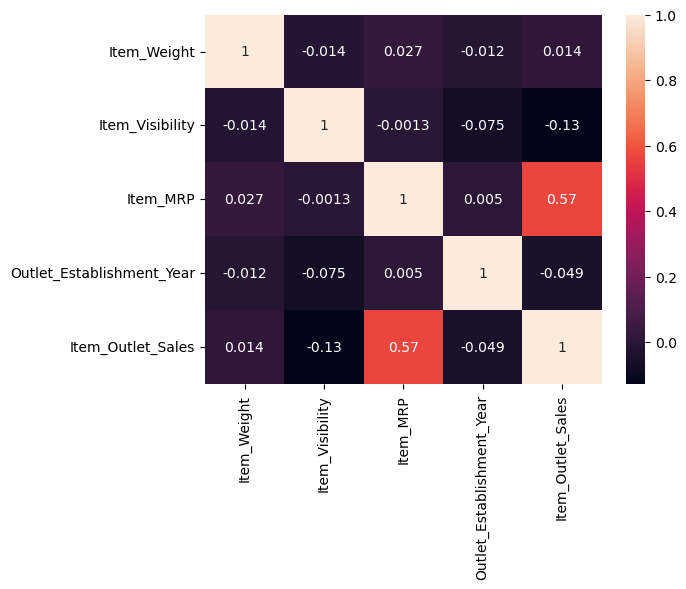

In [31]:
sns.heatmap(train.corr(),annot=True)

<Axes: xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

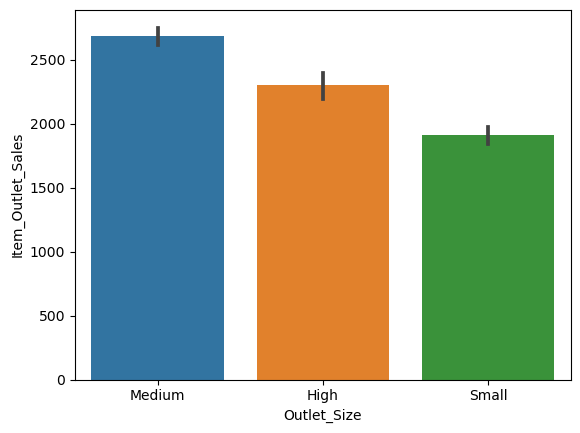

In [32]:
sns.barplot(data=train,x='Outlet_Size',y='Item_Outlet_Sales')

In [33]:
# We cannot use KNN Imputer since the there are still categorical values in the data
"""imputer = KNNImputer(n_neighbors=5)
train = pd.DataFrame(imputer.fit_transform(train),columns = train.columns)"""

'imputer = KNNImputer(n_neighbors=5)\ntrain = pd.DataFrame(imputer.fit_transform(train),columns = train.columns)'

* OutLet_Size is a catogerial column, we can use the mode to fill the missing values.

* Item_weight is a numeric column and after visualizations, we can see clearly that there are no outliers in this feature. So we can replace missing values with its mean.

In [34]:
# filling the object values with mode and float type with mean 

# for train 
train['Outlet_Size']=train.Outlet_Size.fillna(train.Outlet_Size.dropna().mode()[0])
train['Item_Weight']=train.Item_Weight.fillna(train.Item_Weight.mean())

In [35]:
# for test 
test['Outlet_Size']=test.Outlet_Size.fillna(test.Outlet_Size.dropna().mode()[0])
test['Item_Weight']=test.Item_Weight.fillna(test.Item_Weight.mean())

In [36]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### Feature Engineering

In [37]:
# function to detect outliers using the IQR method 

def detect_outliers(df,feature):
    q1=df[feature].quantile(0.25)
    q3=df[feature].quantile(0.75)
    IQR=q3-q1
    
    upper_limit=q3+1.5*IQR
    lower_limit=q1-1.5*IQR
    return upper_limit,lower_limit

upper,lower=detect_outliers(train,'Item_Visibility')
print('Upper limit: ',upper)
print('Lower limit: ',lower)

Upper limit:  0.195979015
Lower limit:  -0.07440424500000001


In [38]:
# removing outliers using the above function 
train=train[(train['Item_Visibility']>lower)&(train['Item_Visibility']<upper)]
test=test[(test['Item_Visibility']>lower)&(test['Item_Visibility']<upper)]

<Axes: >

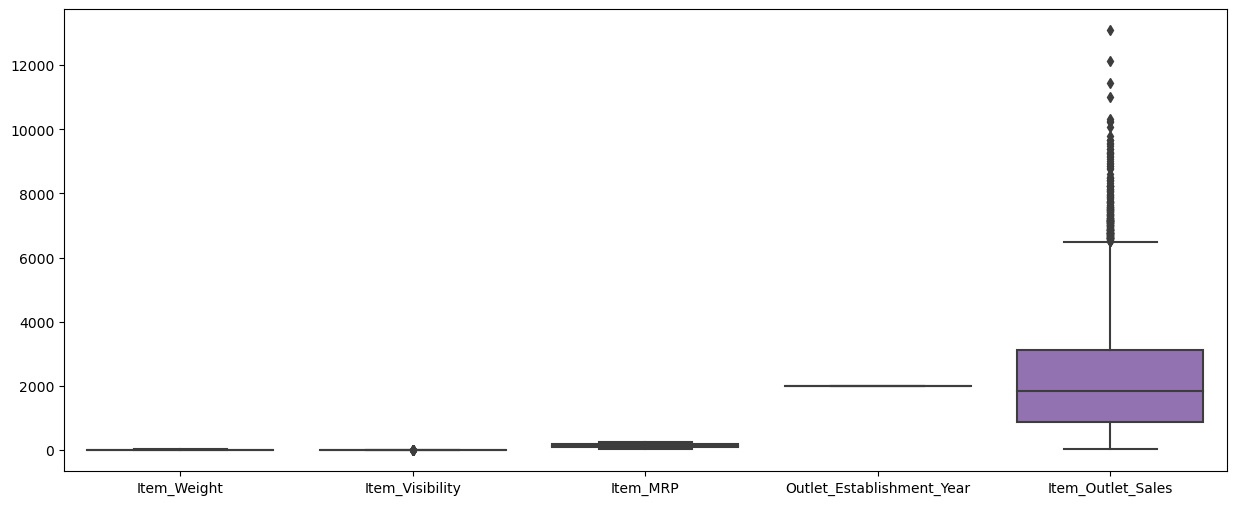

In [39]:
plt.figure(figsize=(15,6))
sns.boxplot(train)
# Outliers removed 

In [40]:
upper,lower=detect_outliers(train,'Item_Outlet_Sales')
print('Upper limit: ',upper)
print('Lower limit: ',lower)

Upper limit:  6499.2067
Lower limit:  -2499.7460999999994


In [41]:
train=train[(train['Item_Outlet_Sales']>lower)&(train['Item_Outlet_Sales']<upper)]

<Axes: >

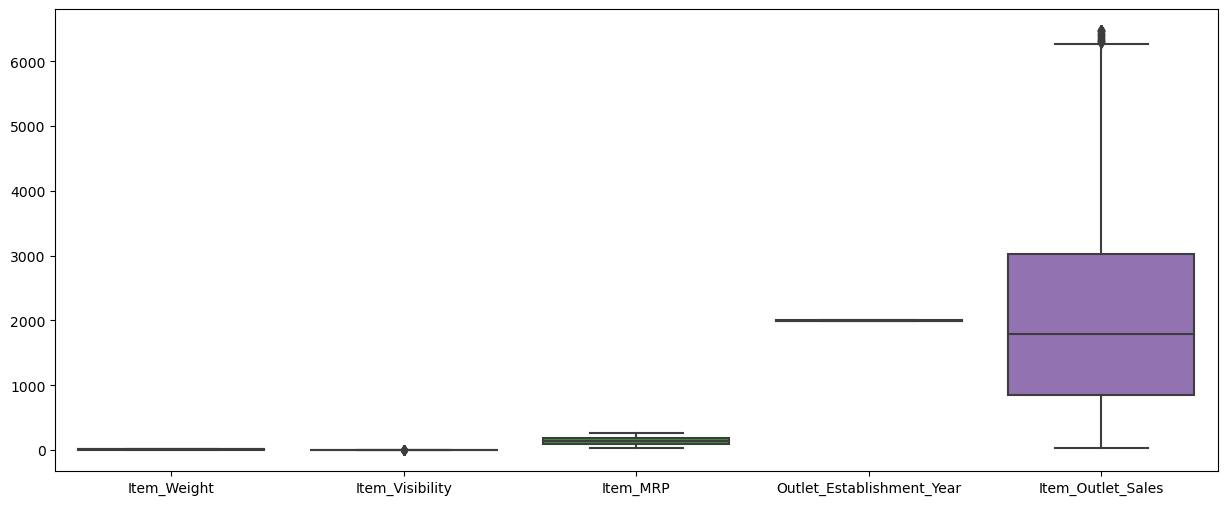

In [42]:
plt.figure(figsize=(15,6))
sns.boxplot(train)
# Outliers removed 

In [43]:
# lets correct the errors in the Item_Fat_content

train['Item_Fat_Content']=train['Item_Fat_Content'].map({'Low Fat':'Low Fat',
                                                        'low fat':'Low Fat',
                                                         'LF':'Low Fat',
                                                        'Regular':'Regular',
                                                        'reg':'Regular'})

In [44]:
# lets correct the errors in the Item_Fat_content

test['Item_Fat_Content']=test['Item_Fat_Content'].map({'Low Fat':'Low Fat',
                                                        'low fat':'Low Fat',
                                                         'LF':'Low Fat',
                                                        'Regular':'Regular',
                                                        'reg':'Regular'})

<Axes: xlabel='Item_Fat_Content', ylabel='count'>

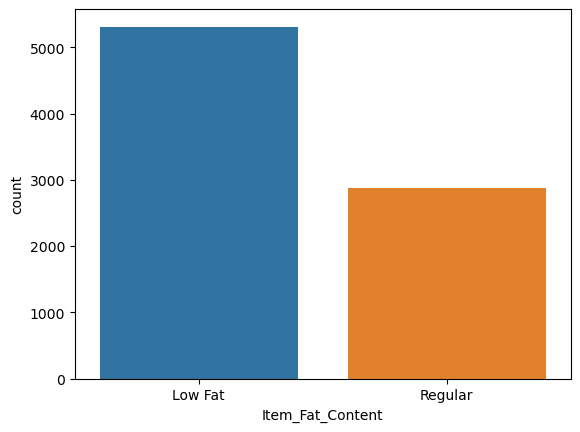

In [45]:
sns.countplot(x=train['Item_Fat_Content'])

<Axes: xlabel='Outlet_Age', ylabel='count'>

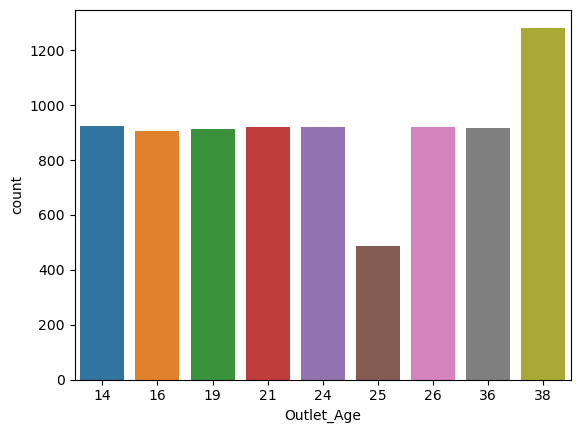

In [46]:
train['Outlet_Age']=2023-train['Outlet_Establishment_Year']
test['Outlet_Age']=2023-test['Outlet_Establishment_Year']

del train['Outlet_Establishment_Year']
del test['Outlet_Establishment_Year']

sns.countplot(x=train['Outlet_Age'])

### Encoding Categorical Variables

* Label Encoding

In [47]:
test['Outlet_Size']=test['Outlet_Size'].map({'Small':1,'Medium':2,'High':3}).astype(int)

In [48]:
train['Outlet_Size']=train['Outlet_Size'].map({'Small':1,'Medium':2,'High':3}).astype(int)

<Axes: xlabel='Outlet_Size', ylabel='count'>

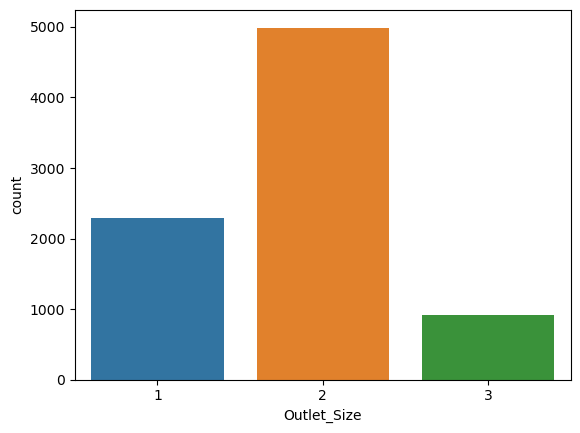

In [49]:
sns.countplot(x=train['Outlet_Size'])

<Axes: xlabel='Outlet_Location_Type', ylabel='count'>

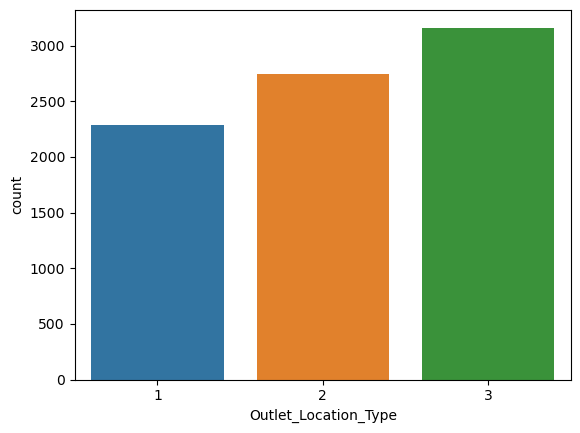

In [50]:
# Outlet_Location_Type feature encoding by getting the last character and converting to int type

train['Outlet_Location_Type'] = train['Outlet_Location_Type'].str[-1:].astype(int)
test['Outlet_Location_Type']  = test['Outlet_Location_Type'].str[-1:].astype(int)

sns.countplot(x=train['Outlet_Location_Type'])

In the Item_Type feature, there are 16 catgories but when we look closely to Item_Identifier_Categories, it has first two characters defining the item type, these are:

* FD for probably Food;
* DR for probably Drinks;
* NC for probably Non-Consumables.

**So we'll drop the Item_Identifier feature and create a new column containing these categories.**

<Axes: xlabel='Item_Identifier_Categories', ylabel='count'>

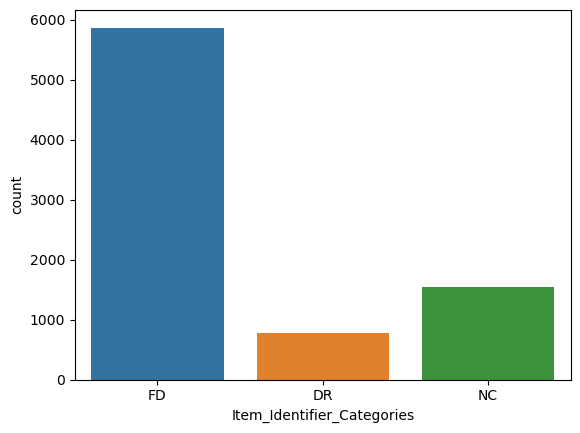

In [51]:
train['Item_Identifier_Categories'] = train['Item_Identifier'].str[0:2] #.astype(int)
test['Item_Identifier_Categories']  = test['Item_Identifier'].str[0:2]

sns.countplot(x=train['Item_Identifier_Categories'])

In [52]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Item_Identifier_Categories
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,2,1,Supermarket Type1,3735.1380,24,FD
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2,3,Supermarket Type2,443.4228,14,DR
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,2,1,Supermarket Type1,2097.2700,24,FD
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,2,3,Grocery Store,732.3800,25,FD
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,3,3,Supermarket Type1,994.7052,36,NC


In [53]:
# Label Encoder for ordinate Data 
encoder=LabelEncoder()
ordinal_features=['Item_Fat_Content','Outlet_Type','Outlet_Location_Type']

for i in ordinal_features:
    train[i]=encoder.fit_transform(train[i])
    test[i]=encoder.fit_transform(test[i])

In [54]:
train.shape

(8193, 13)

In [55]:
test.shape

(5570, 12)

* One Hot Encoding  

In [56]:
# One Hot Encoding for 'Item_Type' variable

train = pd.get_dummies(train, columns=['Item_Type', 'Item_Identifier_Categories', 'Outlet_Identifier'], drop_first=True)
test  = pd.get_dummies(test,  columns=['Item_Type', 'Item_Identifier_Categories', 'Outlet_Identifier'], drop_first=True)

In [57]:
print(train.shape)
print(test.shape)

(8193, 36)
(5570, 35)


## Preprocessing Data 

In [58]:
# Let's drop useless columns
train.drop(labels=['Item_Identifier'], axis=1, inplace=True)
test.drop(labels=['Item_Identifier'],  axis=1, inplace=True)

In [59]:
X=train.drop('Item_Outlet_Sales',axis=1)
y=train['Item_Outlet_Sales']

In [60]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

# Modelling

**Linear Regression**

In [61]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [62]:
lr_pred=lr.predict(X_test)

In [63]:
print('Training score  : {}'.format(lr.score(X_train, y_train)))
print('Test score      : {}'.format(lr.score(X_test, y_test)))

Training score  : 0.5516657749034781
Test score      : 0.5471728591811289


In [64]:
import math

In [65]:
lr_mse=mean_squared_error(y_test,lr_pred)
lr_rmse=math.sqrt(lr_mse)
lr_r2=r2_score(y_test,lr_pred)

In [66]:
print('RMSE  \t ----> {}'.format(lr_rmse))
print('R2 Score ----> {}'.format(lr_r2))

RMSE  	 ----> 1021.5214420862883
R2 Score ----> 0.5471728591811289


## Inference

The **LinearRegression** model above give us a training accuracy and a test accuracy of about 55%. We also get an RMSE of about 1021.52 and a R2 score of 0.54.
Let's try to add some polynomial features to see how good the Linear Regression performs. However, something else we would like to do is standardize our data. This scales our data down to a range between 0 and 1. This serves the purpose of letting us work with reasonable numbers when we raise to a power.

# Random Forest 

In [67]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [68]:
rf_pred=rf.predict(X_test)
rf_pred

array([2359.721702,  893.03754 , 2650.84941 , ..., 1534.36939 ,
       2791.473028, 3056.95412 ])

In [69]:
print('Training score  : {}'.format(rf.score(X_train, y_train)))
print('Test score      : {}'.format(rf.score(X_test, y_test)))

Training score  : 0.9336992501331531
Test score      : 0.5250233804253588


In [70]:
# Evaluation
rand_forest_mse = mean_squared_error(y_test , rf_pred)
rand_forest_rmse = math.sqrt(rand_forest_mse)
rand_forest_r2 = r2_score(y_test, rf_pred)

print('RandomForest RMSE  \t ----> {}'.format(rand_forest_rmse))
print('RandomForest R2 Score   ----> {}'.format(rand_forest_r2))

RandomForest RMSE  	 ----> 1046.2064150994117
RandomForest R2 Score   ----> 0.5250233804253588


The gap between the training score and the test score is huge so RandomForest is overfitting the data. We can handle this issue with hyperparameter tuning

# XGBoost

In [71]:
xgb=XGBRegressor()
xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [72]:
xgb_pred=xgb.predict(X_test)

In [73]:
print('XGBoost Training score  : {}'.format(xgb.score(X_train, y_train)))
print('XGBoost Test score      : {}'.format(xgb.score(X_test, y_test)))

XGBoost Training score  : 0.855475128396549
XGBoost Test score      : 0.4740711163368567


XGBoost is also overfitting the data. We'll try after to tune the hyperparameters for XGBoost and see how the model performs.

In [74]:
# Evaluation
xgb_mse = mean_squared_error(y_test , xgb_pred)
xgb_rmse = math.sqrt(xgb_mse)
xgb_r2 = r2_score(y_test, xgb_pred)

print('XGBoost RMSE  \t   ----> {}'.format(xgb_rmse))
print('XGBoost R2 Score   ----> {}'.format(xgb_r2))

XGBoost RMSE  	   ----> 1100.892147232883
XGBoost R2 Score   ----> 0.4740711163368567


## Decision Tree Regressor

In [75]:
from sklearn.tree import DecisionTreeRegressor

In [76]:
dc=DecisionTreeRegressor()
dc.fit(X_train,y_train)

DecisionTreeRegressor()

In [77]:
dc_pred=dc.predict(X_test)

In [78]:
print('DecisionTree Training score  : {}'.format(dc.score(X_train, y_train)))
print('DecisionTree Test score      : {}'.format(dc.score(X_test, y_test)))

DecisionTree Training score  : 1.0
DecisionTree Test score      : 0.14957405627216536


In [79]:
dc_mse = mean_squared_error(y_test , dc_pred)
dc_rmse = math.sqrt(dc_mse)
dc_r2 = r2_score(y_test, dc_pred)
print('DecisionTree RMSE  \t   ----> {}'.format(dc_rmse))
print('DecisionTree R2 Score   ----> {}'.format(dc_r2))

DecisionTree RMSE  	   ----> 1399.9080563475648
DecisionTree R2 Score   ----> 0.14957405627216536
